In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv('casino_crime.csv')
df.head()

,Id,Year,State,Countym,Industry,Suspicious Activity,Count,Lat,Long
0,0,2014,Arizona,Coconino County,Tribal Authorized Casino,Alters or Cancels Transaction to Avoid CTR Req...,1,35.829692,-111.773728
1,1,2014,Arizona,Coconino County,Tribal Authorized Casino,Exchanges Small Bills for Large Bills or Vice ...,1,35.829692,-111.773728
2,2,2014,Arizona,Coconino County,Tribal Authorized Casino,Other Structuring,1,35.829692,-111.773728
3,3,2014,Arizona,Coconino County,Tribal Authorized Casino,Provided Questionable or False Documentation,1,35.829692,-111.773728
4,4,2016,Arizona,Coconino County,Tribal Authorized Casino,Account Takeover,1,35.829692,-111.773728


In [40]:
df['Count'] = df['Count'].str.replace(',', '').astype(float).astype(int)

In [41]:
data = df[['State', 'Industry', 'Suspicious Activity', 'Count']]

data.head()

,State,Industry,Suspicious Activity,Count
0,Arizona,Tribal Authorized Casino,Alters or Cancels Transaction to Avoid CTR Req...,1
1,Arizona,Tribal Authorized Casino,Exchanges Small Bills for Large Bills or Vice ...,1
2,Arizona,Tribal Authorized Casino,Other Structuring,1
3,Arizona,Tribal Authorized Casino,Provided Questionable or False Documentation,1
4,Arizona,Tribal Authorized Casino,Account Takeover,1


In [42]:
data.dtypes

State                  object
Industry               object
Suspicious Activity    object
Count                   int64
dtype: object

In [43]:
activity = data.groupby(['Suspicious Activity', 'State', 'Industry'])['Count'].sum().reset_index()
activity.dtypes

Suspicious Activity    object
State                  object
Industry               object
Count                   int64
dtype: object

In [80]:
activity.head()

,Count,Suspicious Activity_ACH,Suspicious Activity_Account Takeover,Suspicious Activity_Against Financial Institution Customer(s),Suspicious Activity_Against Financial Institution(s),Suspicious Activity_Alters or Cancels Transaction to Avoid BSA Recordkeeping Requirement,Suspicious Activity_Alters or Cancels Transaction to Avoid CTR Requirement,Suspicious Activity_Appraisal Fraud,Suspicious Activity_Bribery or Gratuity,Suspicious Activity_Business Loan,...,State_Arizona,State_California,State_Colorado,State_Nevada,State_New Mexico,State_Utah,Industry_ Card Club,Industry_ Other Casino/Card Club,Industry_ State Licensed Casino,Industry_ Tribal Authorized Casino
0,2,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,30,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,12,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [44]:
activity = pd.get_dummies(activity)
activity.head()

,Count,Suspicious Activity_ACH,Suspicious Activity_Account Takeover,Suspicious Activity_Against Financial Institution Customer(s),Suspicious Activity_Against Financial Institution(s),Suspicious Activity_Alters or Cancels Transaction to Avoid BSA Recordkeeping Requirement,Suspicious Activity_Alters or Cancels Transaction to Avoid CTR Requirement,Suspicious Activity_Appraisal Fraud,Suspicious Activity_Bribery or Gratuity,Suspicious Activity_Business Loan,...,State_Arizona,State_California,State_Colorado,State_Nevada,State_New Mexico,State_Utah,Industry_ Card Club,Industry_ Other Casino/Card Club,Industry_ State Licensed Casino,Industry_ Tribal Authorized Casino
0,2,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,30,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,12,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
X = activity.drop(columns = ['Count'])
y = activity['Count'].values.reshape(-1, 1)
print(X.shape, y.shape)

(555, 94) (555, 1)


In [46]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [48]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [81]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
X_train_scaled

array([[-0.0695048 , -0.09853293, -0.04908807, ..., -0.28375955,
        -0.77459667,  1.16774842],
       [-0.0695048 , -0.09853293, -0.04908807, ..., -0.28375955,
         1.29099445, -0.85634884],
       [-0.0695048 , -0.09853293, -0.04908807, ..., -0.28375955,
         1.29099445, -0.85634884],
       ...,
       [-0.0695048 , -0.09853293, -0.04908807, ..., -0.28375955,
         1.29099445, -0.85634884],
       [-0.0695048 , -0.09853293, -0.04908807, ..., -0.28375955,
        -0.77459667,  1.16774842],
       [-0.0695048 , -0.09853293, -0.04908807, ..., -0.28375955,
        -0.77459667,  1.16774842]])

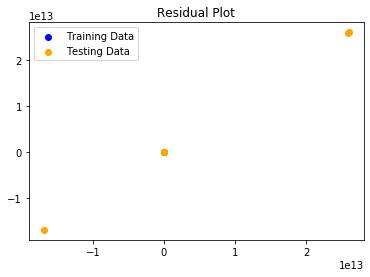

In [82]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
#model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [51]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 7.580946385478089e+26, R2: -1.7085281948761445e+26


In [52]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 4.049255599331203, R2: 0.08741375971607479


In [53]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 3.969955647351148, R2: 0.10528569771972351


In [54]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 4.007458509657613, R2: 0.09683362664824191


In [55]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [57]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
from tensorflow.keras.utils import to_categorical

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [59]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [95]:
y_test

array([[ 551],
       [   1],
       [   1],
       [1049],
       [ 234],
       [   2],
       [ 275],
       [   1],
       [ 183],
       [ 257],
       [  16],
       [  77],
       [   8],
       [   2],
       [ 510],
       [  12],
       [   5],
       [   6],
       [1026],
       [  24],
       [   8],
       [   1],
       [  30],
       [   2],
       [ 854],
       [   2],
       [ 169],
       [ 311],
       [  23],
       [   5],
       [   2],
       [ 162],
       [   3],
       [ 152],
       [   1],
       [  40],
       [ 191],
       [   2],
       [  19],
       [   1],
       [ 431],
       [   3],
       [   1],
       [   2],
       [  43],
       [   1],
       [  29],
       [  42],
       [   1],
       [  75],
       [   8],
       [   1],
       [   1],
       [  10],
       [ 533],
       [ 771],
       [ 103],
       [ 519],
       [ 217],
       [   4],
       [   1],
       [ 316],
       [  94],
       [ 174],
       [   1],
       [1446],
       [  

In [90]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=600, activation='relu', input_dim=94))
model.add(Dense(units=1, activation='softmax'))

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 600)               57000     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 601       
Total params: 57,601
Trainable params: 57,601
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

ValueError: You are passing a target array of shape (416, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.